# Hierarchical Clustering

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!wget https://raw.githubusercontent.com/BaoLocPham/MachineLearningFromScratch/main/Data/Clustering/Mall_Customers.csv

--2021-09-18 13:04:30--  https://raw.githubusercontent.com/BaoLocPham/MachineLearningFromScratch/main/Data/Clustering/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4086 (4.0K) [text/plain]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   3.99K  --.-KB/s    in 0s      

2021-09-18 13:04:30 (29.4 MB/s) - ‘Mall_Customers.csv’ saved [4086/4086]



## Importing the dataset

In [3]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

In [4]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Using the dendrogram to find the optimal number of clusters

[]

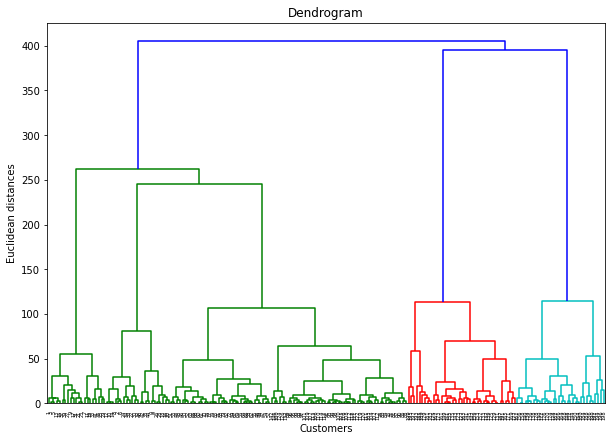

In [6]:
# This time we'll use Scipy module
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.plot()

> 🔑We will chose 5 to be the num of clusters

## Training the Hierarchical Clustering model on the dataset

In [11]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_pred = hc.fit_predict(X)

## Visualising the clusters

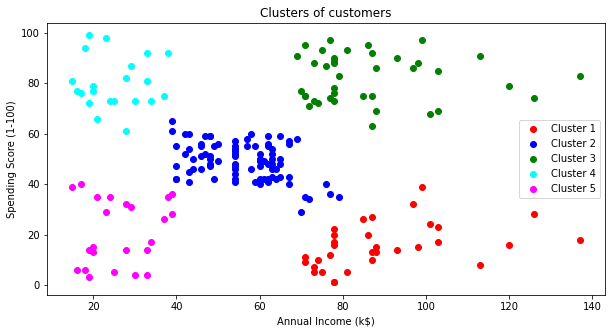

In [14]:
plt.figure(figsize=(10,5))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(5):
  plt.scatter(X[y_pred==i, 0], X[y_pred==i,1], c=colors[i], label=f"Cluster {i+1}")
# Hierarchical clustering don't have centroids :)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()